# Atlanta Crime - Unsupervised Learning

## Description

In this part of the project, we will use unsupervised learning algorithms, namely, DBSCAN, K-Means, and Mean Shift clustering algorithms to analyze the Atlanta Crime dataset. Clustering based on both location and time will provide us more insights about the dataset that will be useful in understanding the data prior to building our predictive models with supervised learning algorithms

[DBSCAN Method 2](#method2)

## Import Libraries

In [2]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [3]:
# Packages for geospatial analysis
# Link: https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

## Load Data

In [4]:
# 2019
data = pd.read_csv("COBRA-2019.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
# Cleaned 2009-2018
#data = pd.read_csv("cobra-clean.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
X = data.to_numpy()
head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

,Latitude,Longitude
0,33.75194,-84.38964
1,33.75312,-84.39208
2,33.68077,-84.49370
3,33.75126,-84.37207
4,33.70204,-84.44972
5,33.75082,-84.39615
6,33.69612,-84.50370
7,33.81022,-84.41347
8,33.82010,-84.36481
9,33.76909,-84.38208


## Crime Category Graphs

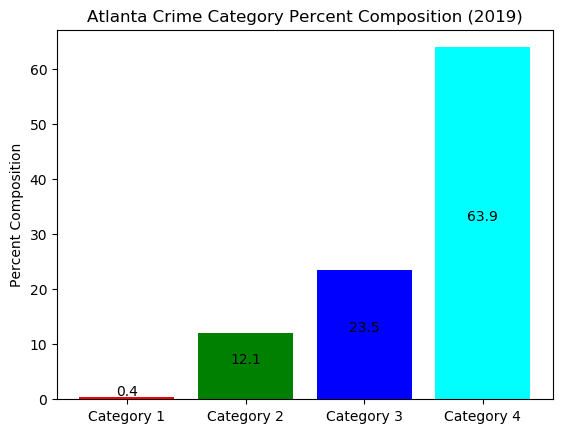

In [108]:
data = pd.read_csv("data/Supervised_Algs/cobra-clean2019.csv")

objects = ('Category 1', 'Category 2', 'Category 3', 'Category 4')
y_pos = np.arange(len(objects))
cat1 = len(data[(data['Crime Category']==1)])
cat2 = len(data[(data['Crime Category']==2)])
cat3 = len(data[(data['Crime Category']==3)])
cat4 = len(data[(data['Crime Category']==4)])
performance = np.array([cat1,cat2,cat3,cat4])
total = cat1 + cat2 + cat3 + cat4
percents = np.round((performance/total)*100,1)

def autolabel(rects):
    for idx,rect in enumerate(percent_bar):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                percents[idx],
                ha='center', va='bottom', rotation=0)

percent_bar = plt.bar(y_pos, percents, align='center', color=['red', 'green', 'blue', 'cyan'])
#alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percent Composition')
plt.title('Atlanta Crime Category Percent Composition (2019)')

autolabel(percent_bar)

plt.savefig('images/Unsupervised_Algs/percentcomp2019_histogram.png')
plt.show()

## Crime Score Graphs

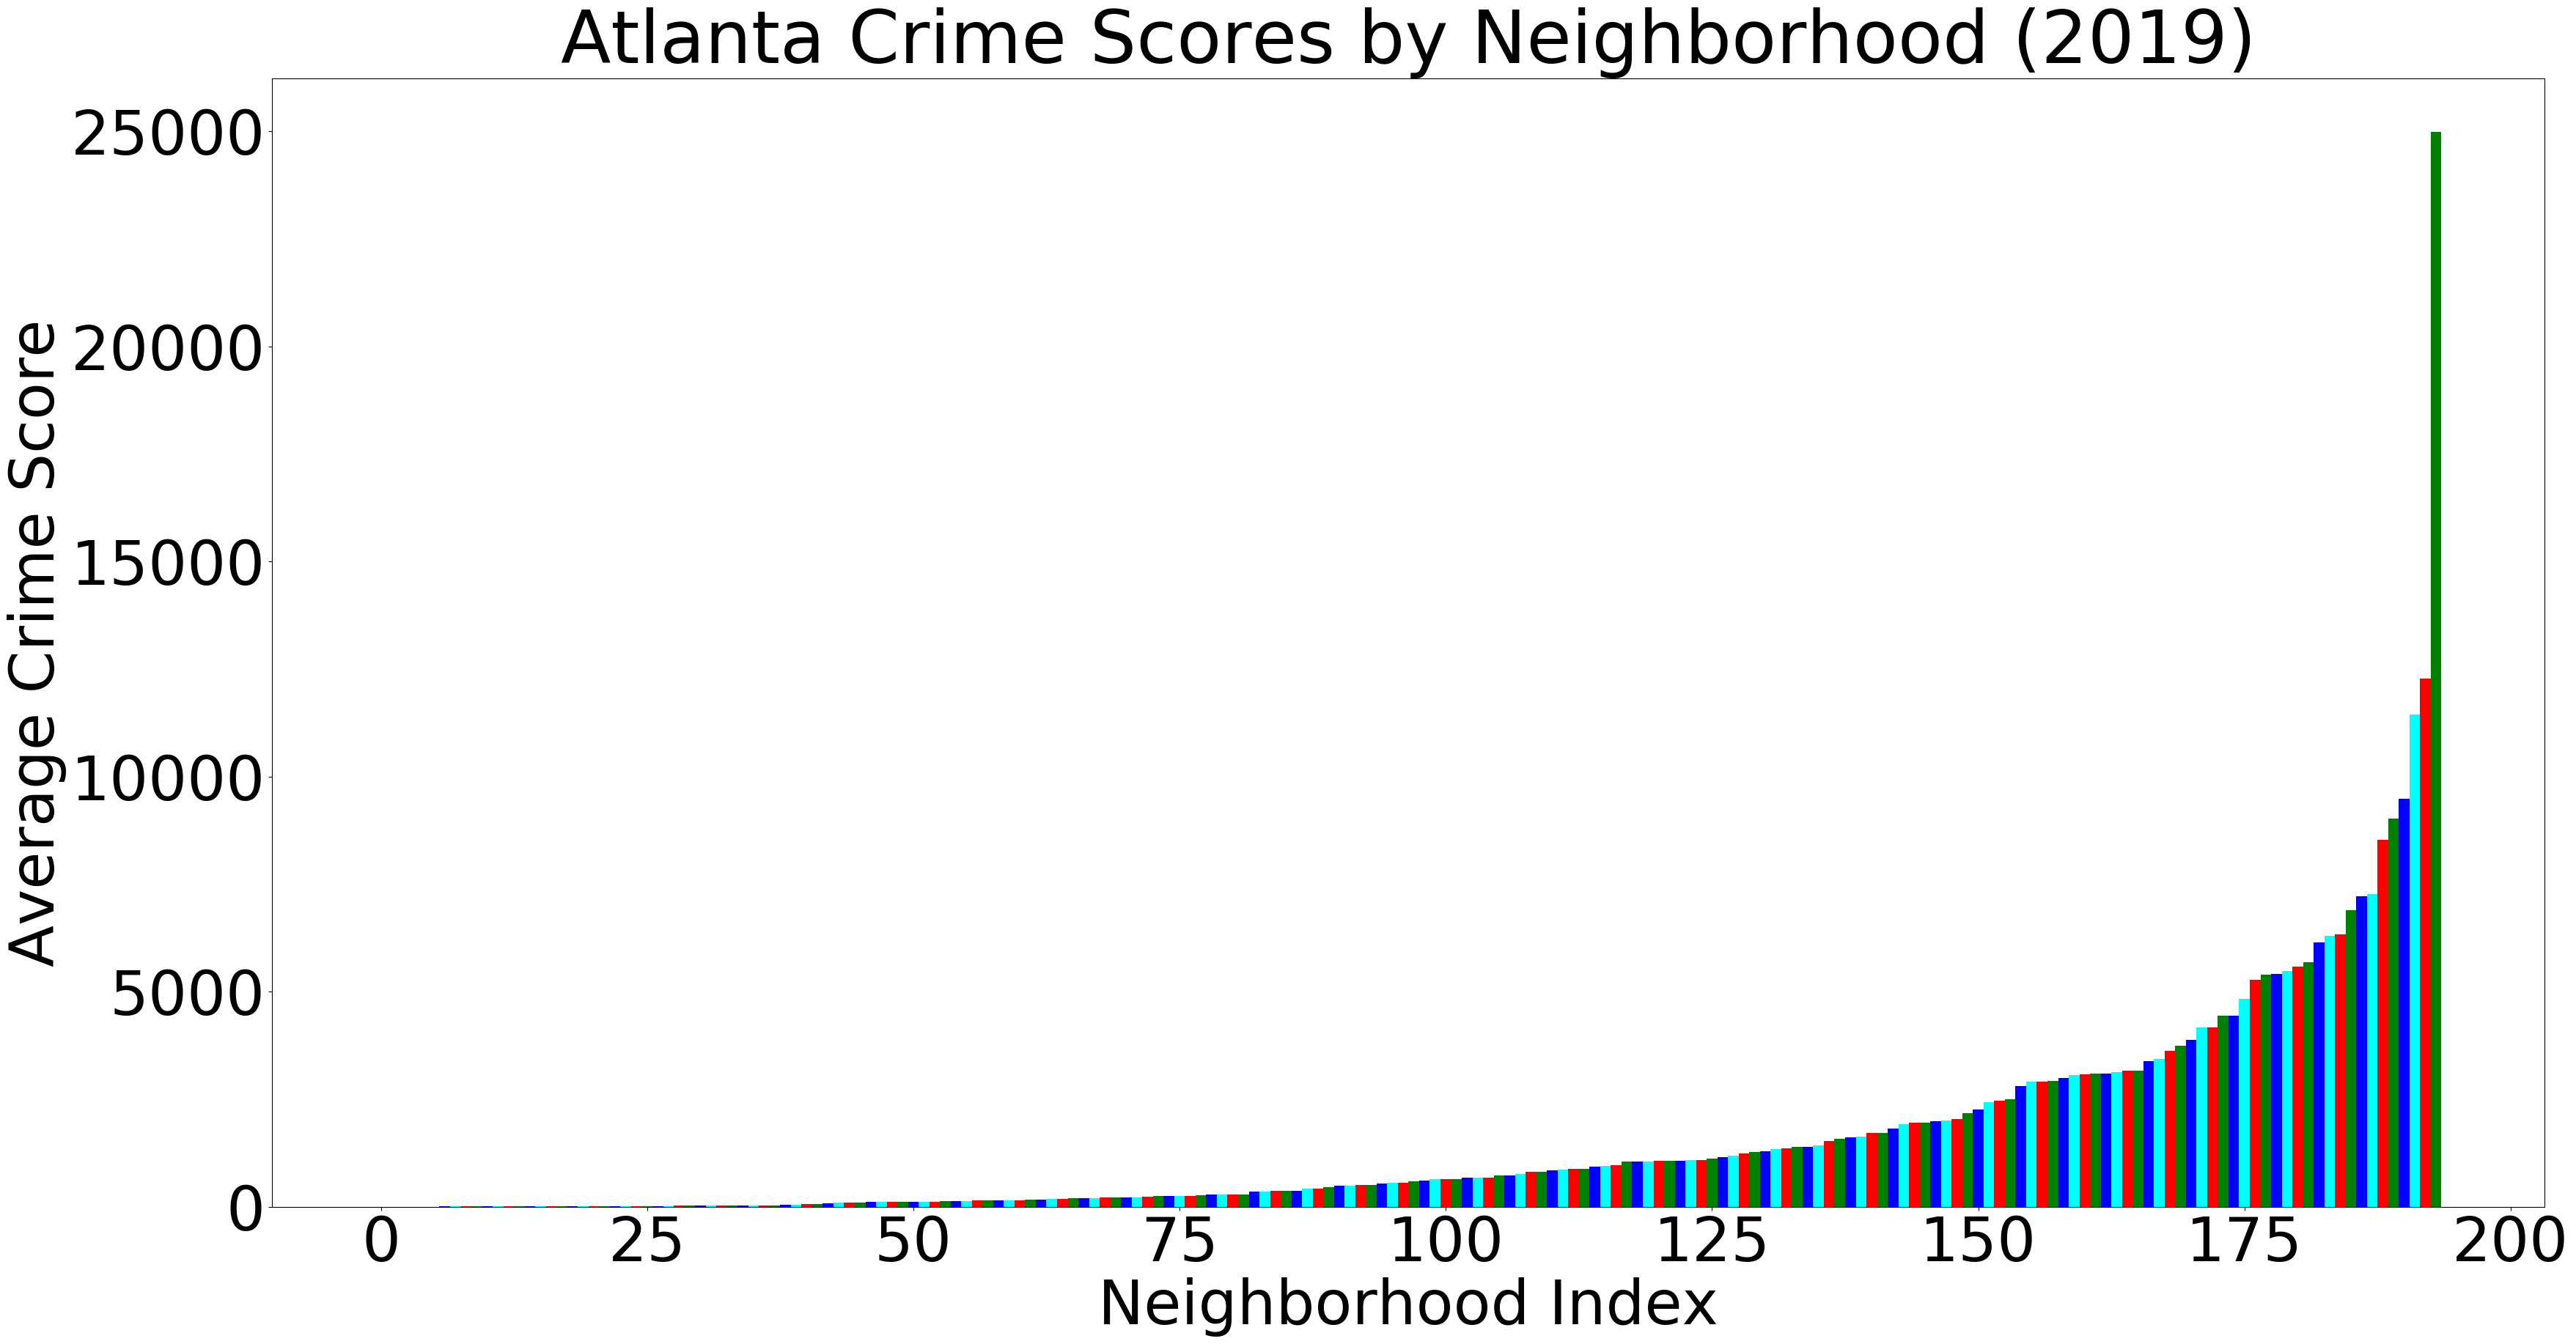

In [109]:
data2 = pd.read_csv("data/Supervised_Algs/cobra-counts2019.csv")
data2['Crime Score']  = (1000 * data2['Category 1']) + (100 * data2['Category 2']) + (10 * data2['Category 3']) + (1 * data2['Category 4'])

n_list = data2.Neighborhood.unique()
y_pos = np.arange(len(n_list))
avg = np.arange(len(n_list))
for i in range(len(n_list)):
    avg[i] = data2[data2['Neighborhood']==n_list[i]]['Crime Score'].sum(axis=0)
p=np.vstack([n_list,avg]).T
avg_data = pd.DataFrame(data=p,columns=['Neighborhood', 'Average Crime Score'])
avg_data =avg_data.sort_values(by=['Average Crime Score'])

avg_data

plt.rcParams.update({'font.size': 60})
plt.figure(figsize=(40, 20))
y_pos2 = [2*i for i in y_pos]
Avg_bar = plt.bar(y_pos, avg_data['Average Crime Score'], width=1,align='center', color=['red', 'green', 'blue', 'cyan'])
#alpha=0.5)
#plt.xticks(y_pos2, y_pos, rotation = 'vertical')
plt.xlabel('Neighborhood Index')
plt.ylabel('Average Crime Score')
plt.title('Atlanta Crime Scores by Neighborhood (2019)')

plt.savefig('images/Unsupervised_Algs/crimescore2019_histogram.png')
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

In [5]:
# Geo spatial
df = pd.read_csv('COBRA-2019.csv')
coords = df.as_matrix(columns=['Latitude', 'Longitude'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Plot DBSCAN Function

In [6]:
def plot_dbscan(labels):
    #colors = ['y', 'b', 'g', 'r']
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors): 
        if k == -1: 
            # Black used for noise. 
            col = 'k'
        class_member_mask = (labels == k) 

        xy = X[class_member_mask & core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k',  
                                          markersize=6) 

        xy = X[class_member_mask & ~core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k', 
                                          markersize=6) 
  
    plt.title('number of clusters: %d' %n_clusters) 
    plt.ylim(bottom = -84.6, top = -84.25)
    plt.xlim(left = 33.62, right = 33.9)
    plt.show() 

## K-Distance Plot (Elbow Method)

k-distance plot for k= 3
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)
--------------------------------------------------------------


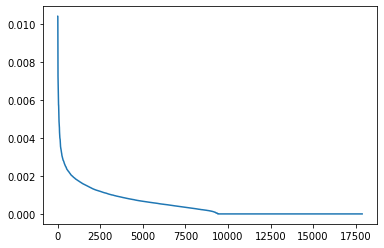

--------------------------------------------------------------
k-distance plot for k= 5
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)
--------------------------------------------------------------


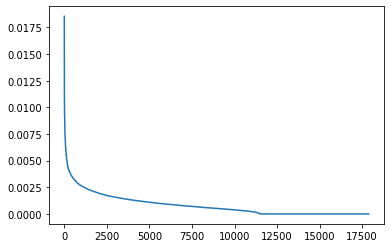

--------------------------------------------------------------
k-distance plot for k= 10
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
--------------------------------------------------------------


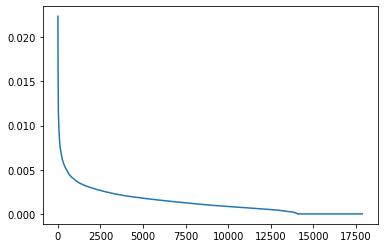

--------------------------------------------------------------
k-distance plot for k= 15
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                 radius=1.0)
--------------------------------------------------------------


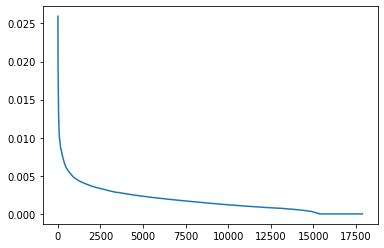

--------------------------------------------------------------
k-distance plot for k= 25
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                 radius=1.0)
--------------------------------------------------------------


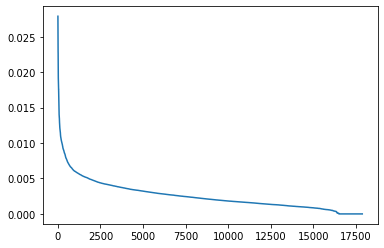

--------------------------------------------------------------
k-distance plot for k= 50
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                 radius=1.0)
--------------------------------------------------------------


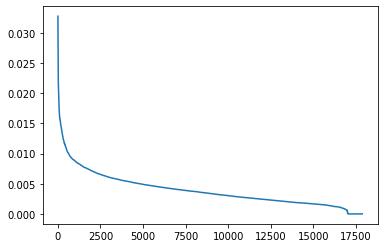

--------------------------------------------------------------
k-distance plot for k= 100
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)
--------------------------------------------------------------


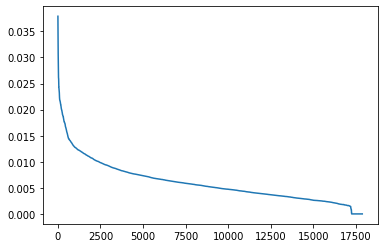

--------------------------------------------------------------


In [7]:
min_samples_array = np.array([3,5,10,15,25,50,100])
#min_samples_array = np.array([2,3,4,5,15,30,75])
for k in min_samples_array:
    nbrs = neighbors.NearestNeighbors(k).fit(X)
    distances, indices = nbrs.kneighbors(X)
    k_distances = distances[:,-1]
    k_distances = -np.sort((-k_distances))
    points = np.arange(distances.shape[0])
    
    print('k-distance plot for k=',k)
    print('nbrs', nbrs)
    
    print('--------------------------------------------------------------')
    plt.plot(points,k_distances)
    plt.show()
    print('--------------------------------------------------------------')

## Compute DBSCAN

DBSCAN for Eps = 0.002 and min_samples = [3.0]
--------------------------------------------------------------
Number of Clusters:  307
Number of Noise Points:  608
Labels:  [ 0  0  1 ...  0  0 45]


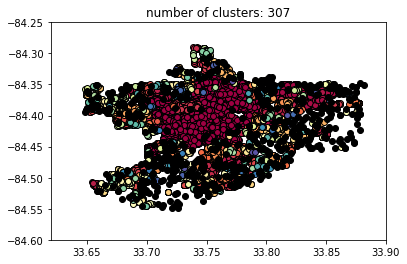

--------------------------------------------------------------
DBSCAN for Eps = 0.003 and min_samples = [5.0]
--------------------------------------------------------------
Number of Clusters:  60
Number of Noise Points:  377
Labels:  [0 0 1 ... 0 0 0]


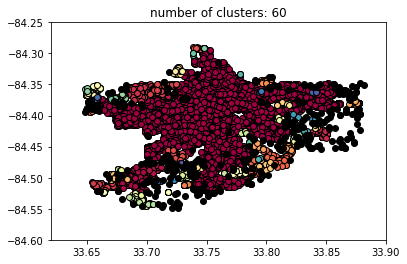

--------------------------------------------------------------
DBSCAN for Eps = 0.004 and min_samples = [10.0]
--------------------------------------------------------------
Number of Clusters:  23
Number of Noise Points:  421
Labels:  [0 0 1 ... 0 0 0]


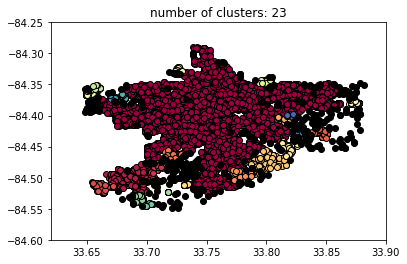

--------------------------------------------------------------
DBSCAN for Eps = 0.005 and min_samples = [15.0]
--------------------------------------------------------------
Number of Clusters:  8
Number of Noise Points:  375
Labels:  [0 0 1 ... 0 0 0]


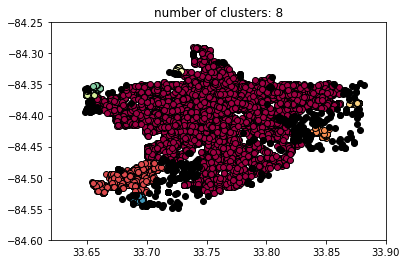

--------------------------------------------------------------
DBSCAN for Eps = 0.007 and min_samples = [20.0]
--------------------------------------------------------------
Number of Clusters:  4
Number of Noise Points:  199
Labels:  [0 0 0 ... 0 0 0]


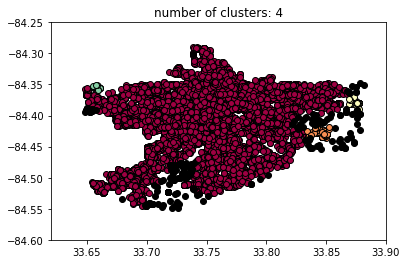

--------------------------------------------------------------
DBSCAN for Eps = 0.009 and min_samples = [50.0]
--------------------------------------------------------------
Number of Clusters:  2
Number of Noise Points:  311
Labels:  [0 0 0 ... 0 0 0]


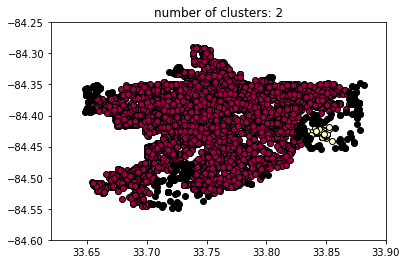

--------------------------------------------------------------
DBSCAN for Eps = 0.011 and min_samples = [100.0]
--------------------------------------------------------------
Number of Clusters:  1
Number of Noise Points:  489
Labels:  [0 0 0 ... 0 0 0]


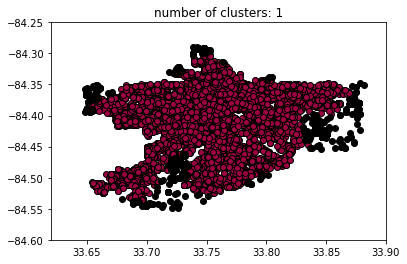

--------------------------------------------------------------


In [8]:
#Parameters are in form of tuples where the first value is eps
#and the second value is min_samples i.e: (eps,min_samples)

#params before 18,000 points were eliminated
#params_array = np.array([(0.002,3),(0.0025,5),(0.004,10),(0.005,15),(0.006,20),(0.007,50),(0.010,100)])

#params after 18,000 points were eliminated 
params_array = np.array([(0.002,3),(0.003,5),(0.004,10),(0.005,15),(0.007,20),(0.009,50),(0.011,100)])
for params in params_array:
    db = sk.cluster.DBSCAN(params[0], params[1]).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print('DBSCAN for Eps =',params[0],'and min_samples =',[params[1]])
    print('--------------------------------------------------------------')
    print('Number of Clusters: ',n_clusters)
    print('Number of Noise Points: ',n_noise)
    print('Labels: ',labels)
    #print('Unique Labels: ',np.unique(labels))
    plot_dbscan(labels)
    print('--------------------------------------------------------------')

## DBSCAN Method 2 (spatial representation)
<a id='method2'></a>

In [9]:
# DBSCAN algo with radians

kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian
db = sk.cluster.DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 49


In [180]:
import random
# hex_number = str(hex(random_number))
# hex_number = '#' + hex_number[2:]
# print('A Random Hex Color Code is :', hex_number)
randomNums = [random.randint(0, 255) for i in range(3 * num_clusters)]
hexes = [hex(r)[2:] if len(hex(r)[2:]) == 2 else '0' + hex(r)[2:] for r in randomNums]
# print(hexes)
cluster_colors = ['#' + ''.join([hexes[j] for j in range(3 * i, 3 * i + 3)]) for i in range(num_clusters)]
# cluster_colors = ['#' + ''.join([hex(random.randint(0, 255))[2:] for i in range(3)]) for j in range(num_clusters)]
# print(cluster_colors, len(cluster_colors))

In [10]:
## Finding center-most point of clusters

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [11]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'Longitude':lons, 'Latitude':lats})

In [12]:
#rs = rep_points.apply(lambda row: df[(df['Latitude']==row['Latitude']) &amp;&amp; (df['Longitude']==row['Longitude'])].iloc[0], axis=1)
rs = rep_points.apply(lambda row: df[(df['Latitude']==row['Latitude']) & (df['Longitude']==row['Longitude'])].iloc[0], axis=1)

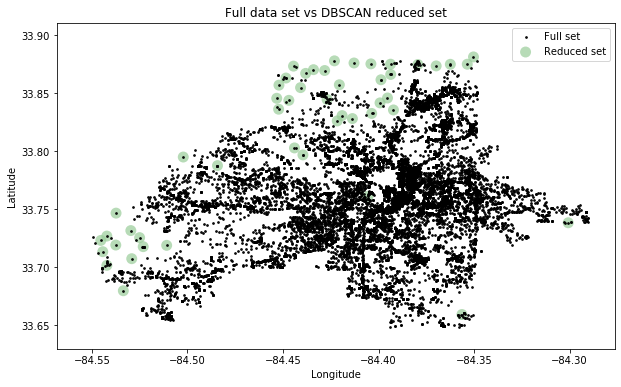

In [13]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [14]:
fig, ax = plt.subplots(figsize=[10, 6])
# df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
#     for x in range(len(cluster_labels)):
#         if cluster_labels[x] == i:
c_by_ind = [[] for i in range(num_clusters)]
for x in range(len(cluster_labels)):
    c_by_ind[cluster_labels[x]].append(x)
for i in range(num_clusters):
    rs_scatter = ax.scatter(rs['Longitude'][i], rs['Latitude'][i], c=cluster_colors[i], edgecolor='None', alpha=0.7, s=120)
    for e in c_by_ind[i]:
        df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_colors[i], alpha=0.9, s=3)
#     for x in range(len(cluster_labels)):
#         if cluster_labels[x] == i:
#             df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_color_assigns[i], alpha=0.9, s=3)
#     for point in clusters[i]:
#         indexNames = [x for x in df[df['Longitude'] == point[1]].index if x in df[df['Latitude'] == point[0]].index]
#         for e in indexNames:
#             df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_color_assigns[i], alpha=0.9, s=3)
#     df_scatter = ax.scatter(clusters[i], clusters[i], c=cluster_color_assigns[i], alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [15]:
fig, ax = plt.subplots(figsize=[10, 6])
# df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
#     for x in range(len(cluster_labels)):
#         if cluster_labels[x] == i:
for i in range(num_clusters):
    for e in c_by_ind[i]:
        df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_colors[i], alpha=0.9, s=3)
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c="k", edgecolor='None', alpha=0.7, s=16)
#     for x in range(len(cluster_labels)):
#         if cluster_labels[x] == i:
#             df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_color_assigns[i], alpha=0.9, s=3)
#     for point in clusters[i]:
#         indexNames = [x for x in df[df['Longitude'] == point[1]].index if x in df[df['Latitude'] == point[0]].index]
#         for e in indexNames:
#             df_scatter = ax.scatter(df['Longitude'][e], df['Latitude'][e], c=cluster_color_assigns[i], alpha=0.9, s=3)
#     df_scatter = ax.scatter(clusters[i], clusters[i], c=cluster_color_assigns[i], alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

## Compute Mean Shift

Bandwidth = 0.02143762118455623
Labels:  [0 0 5 ... 0 0 4]
Unique Labels:  [0 1 2 3 4 5 6 7 8 9]
Cluster Centers:  [[ 33.76585629 -84.38121429]
 [ 33.83916344 -84.36793569]
 [ 33.79296545 -84.40504265]
 [ 33.76510035 -84.45919273]
 [ 33.68813802 -84.40411673]
 [ 33.68809283 -84.49716199]
 [ 33.75543756 -84.50102759]
 [ 33.71290449 -84.45212148]
 [ 33.80925723 -84.46224942]
 [ 33.84224223 -84.427654  ]]
number of estimated clusters : 10


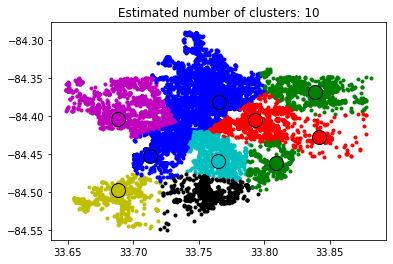

In [31]:
#Parameter
bandwidth = sk.cluster.estimate_bandwidth(X, quantile=0.05, n_samples=1000)

ms = sk.cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
print('Bandwidth =',bandwidth)
print('Labels: ',labels)
print('Unique Labels: ',np.unique(labels))
print('Cluster Centers: ',cluster_centers)
print("number of estimated clusters : %d" % n_clusters)

# Plot result
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

## Compute KMeans

Number of Clusters =  3
--------------------------------------------------------------
Cluster Centers:  [[ 33.735195   -84.47489841]
 [ 33.81454483 -84.38742799]
 [ 33.74210921 -84.38351583]]
Labels:  [2 2 0 ... 1 2 2]
Unique Labels:  [0 1 2]
--------------------------------------------------------------
Number of Clusters =  10
--------------------------------------------------------------
Cluster Centers:  [[ 33.77892141 -84.38761436]
 [ 33.84728588 -84.37041853]
 [ 33.69369259 -84.38620685]
 [ 33.73115697 -84.43325821]
 [ 33.76676617 -84.48296997]
 [ 33.81546181 -84.36826551]
 [ 33.68726938 -84.50194906]
 [ 33.80699978 -84.4272971 ]
 [ 33.7556861  -84.35030015]
 [ 33.75014379 -84.39711834]]
Labels:  [9 9 6 ... 0 8 2]
Unique Labels:  [0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------------------


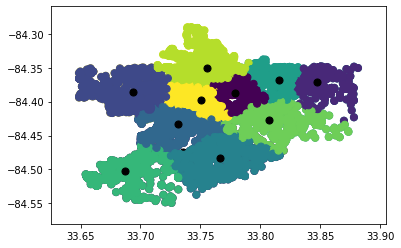

In [52]:
k_values = np.array([3,10])
for k in k_values:
    km = sk.cluster.KMeans(n_clusters = k, init='random',n_init=1,max_iter=300,tol=1e-04,random_state=0)
    y_km = km.fit_predict(X)

    centers = km.cluster_centers_
    labels = km.labels_
    inertia = km.inertia_
    print('Number of Clusters = ',k)
    print('--------------------------------------------------------------')
    print('Cluster Centers: ',centers)
    print('Labels: ',labels)
    print('Unique Labels: ',np.unique(labels))
    plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=1);
    print('--------------------------------------------------------------')

## K Means Elbow Method

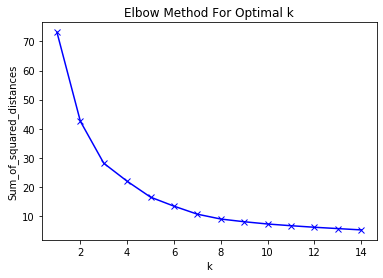

In [47]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()